In [154]:
import os
import re

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [155]:
results_dir = '/home/jann/reegis/scenarios/deflex/2012'

In [156]:
filename = os.path.join(results_dir, 'deflex_combined_results.csv')

results = pd.read_csv(filename, index_col=0).drop(['Model', 'Comment'], 1)

In [157]:
energy_electricity = results.loc[results['Variable'].str.contains('Energy\|Electricity')]

In [158]:
energy_electricity = energy_electricity.loc[~energy_electricity['Variable'].str.contains('Peak demand')]

In [159]:
group_dict = {label: group for label, group in energy_electricity.groupby('Scenario')}

In [160]:
baseline_keys = [key for key in group_dict.keys() if re.search('Baseline', key)]

In [161]:
diff_dict = {}
for key_1 in baseline_keys:
    sector_coverage = key_1.split('|')[-1]
    
    print(sector_coverage)
    
    sector_keys = [key for key in group_dict.keys() if re.search(sector_coverage, key)]
    
    for key_2 in sector_keys:
        diff = group_dict[key_2].reset_index().copy()
        diff.loc[:, 'Value'] -= group_dict[key_1].reset_index().loc[:,'Value']
        diff_dict[key_2] = diff

Electricity and Heat
Electricity only


In [162]:
diff_df = pd.concat(diff_dict.values(), 0)
diff_df

,index,Scenario,Region,Variable,Unit,Value
0,209,25percent battery costs|Full geographic covera...,DE,Energy|Electricity|Lignite,TWh,1.613676
1,210,25percent battery costs|Full geographic covera...,DE,Energy|Electricity|Hard coal,TWh,0.159377
2,211,25percent battery costs|Full geographic covera...,DE,Energy|Electricity|Gas CCGT,TWh,-7.251981
3,212,25percent battery costs|Full geographic covera...,DE,Energy|Electricity|Oil,TWh,-0.512357
4,213,25percent battery costs|Full geographic covera...,DE,Energy|Electricity|Other nonrenewable,TWh,0.417130
5,214,25percent battery costs|Full geographic covera...,DE,Energy|Electricity|Wind onshore,TWh,0.000000
6,215,25percent battery costs|Full geographic covera...,DE,Energy|Electricity|Wind offshore,TWh,0.000000
7,216,25percent battery costs|Full geographic covera...,DE,Energy|Electricity|Solar PV,TWh,0.000000
8,217,25percent battery costs|Full geographic covera...,DE,Energy|Electricity|Hydro ROR,TWh,0.000000
9,218,25percent battery costs|Full geographic covera...,DE,Energy|Electricity|Storage|Liion,TWh,16.573110


25percent battery costs|Full geographic coverage|Electricity and Heat
50percent battery costs|Full geographic coverage|Electricity and Heat
Baseline battery costs|Full geographic coverage|Electricity and Heat
25percent battery costs|Full geographic coverage|Electricity only
50percent battery costs|Full geographic coverage|Electricity only
Baseline battery costs|Full geographic coverage|Electricity only


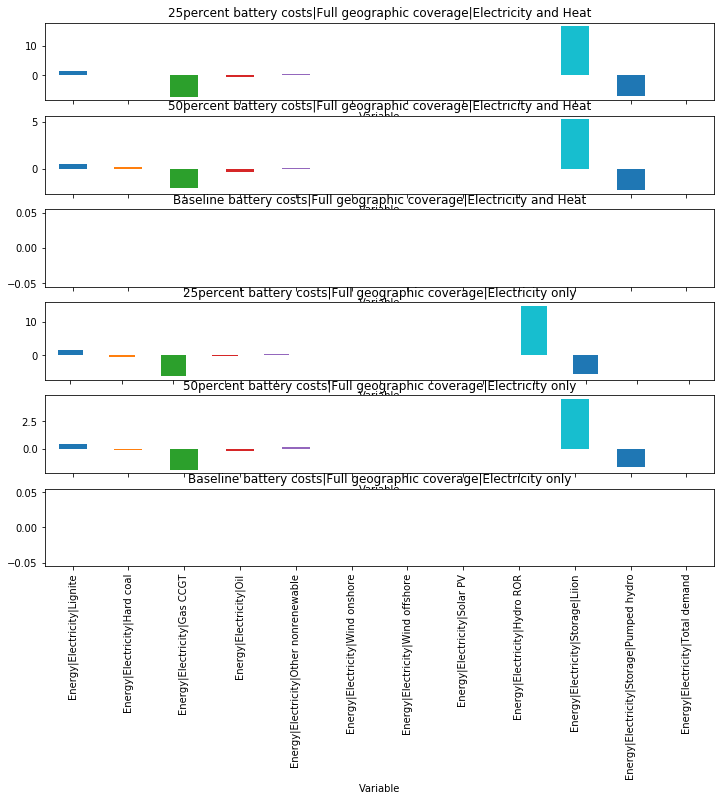

In [163]:
fig, axs = plt.subplots(6, 1, figsize=(12,10))
axs = list(axs)
axs.reverse()
for label, df in diff_dict.items():
    print(label)
    ax = axs.pop()
    df.set_index('Variable').loc[:, 'Value'].plot.bar(ax=ax, stacked=True)
    ax.set_title(label)
    if len(axs)>0:
        ax.set_xticklabels([])
    else:
        pass

In [164]:
diff_df.set_index(['Scenario', 'Variable']).loc[:, ['Value']]

Value
Scenario                                           Variable                                                    
25percent battery costs|Full geographic coverag... Energy|Electricity|Lignite                          1.613676
                                                   Energy|Electricity|Hard coal                        0.159377
                                                   Energy|Electricity|Gas CCGT                        -7.251981
                                                   Energy|Electricity|Oil                             -0.512357
                                                   Energy|Electricity|Other nonrenewable               0.417130
                                                   Energy|Electricity|Wind onshore                     0.000000
                                                   Energy|Electricity|Wind offshore                    0.000000
                                                   Energy|Electricity|Solar PV                         0.000000
                                                   Energy|Electricity|Hydro ROR                        0.000000
                                                   Energy|Electricity|Storage|Liion                   16.573110
                                                   Energy|Electricity|Storage|Pumped hydro            -6.982329
                                                   Energy|Electricity|Total demand                     0.000000
50percent battery costs|Full geographic coverag... Energy|Electricity|Lignite                          0.456632
                                                   Energy|Electricity|Hard coal                        0.172482
                                                   Energy|Electricity|Gas CCGT                        -2.096072
                                                   Energy|Electricity|Oil                             -0.342666
                                                   Energy|Electricity|Other nonrenewable               0.113737
                                                   Energy|Electricity|Wind onshore                     0.000000
                                                   Energy|Electricity|Wind offshore                    0.000000
                                                   Energy|Electricity|Solar PV                         0.000000
                                                   Energy|Electricity|Hydro ROR                        0.000000
                                                   Energy|Electricity|Storage|Liion                    5.261405
                                                   Energy|Electricity|Storage|Pumped hydro            -2.291354
                                                   Energy|Electricity|Total demand                     0.000000
Baseline battery costs|Full geographic coverage... Energy|Electricity|Lignite                          0.000000
                                                   Energy|Electricity|Hard coal                        0.000000
                                                   Energy|Electricity|Gas CCGT                         0.000000
                                                   Energy|Electricity|Oil                              0.000000
                                                   Energy|Electricity|Other nonrenewable               0.000000
                                                   Energy|Electricity|Wind onshore                     0.000000
...                                                                                                         ...
25percent battery costs|Full geographic coverag... Energy|Electricity|Solar PV                         0.000000
                                                   Energy|Electricity|Hydro ROR                        0.000000
                                                   Energy|Electricity|Storage|Liion                   14.792742
                                                   Energy|Electricity|Stor

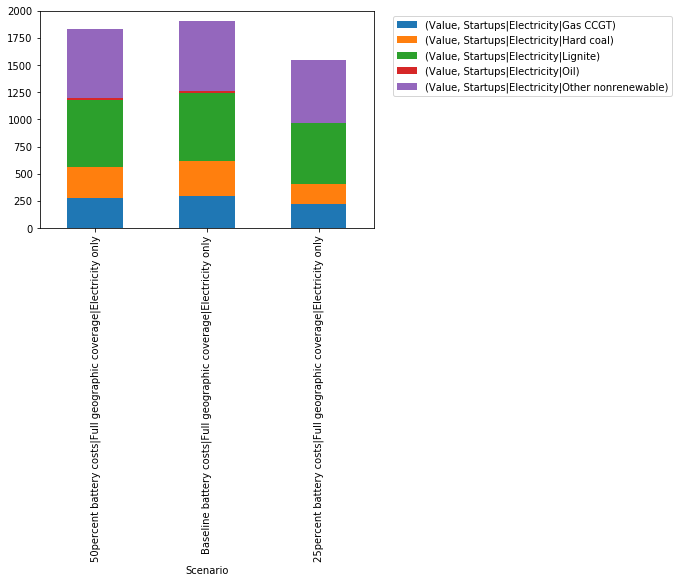

In [187]:
startups = results.loc[results['Variable'].str.contains('Startups')]
startups = startups.set_index(['Scenario', 'Variable'])
el_only_keys = [key for key in startups.index.get_level_values('Scenario').unique() if re.search('only', key)]
startups = startups.loc[el_only_keys,:]
fig, ax = plt.subplots()
startups.unstack().plot.bar(ax=ax, stacked=True)
ax.legend(bbox_to_anchor=(1.04,1), loc="upper left")
